In [5]:
# !pip install matplotlib
!conda env list

# conda environments:
#
base                     /Users/zoungming/miniconda3
AI_hw1                   /Users/zoungming/miniconda3/envs/AI_hw1
PBC_project              /Users/zoungming/miniconda3/envs/PBC_project
test                     /Users/zoungming/miniconda3/envs/test
wmnlab                *  /Users/zoungming/miniconda3/envs/wmnlab
                         /Users/zoungming/opt/anaconda3
                         /Users/zoungming/opt/anaconda3/envs/test_env



In [6]:
!pip list

Package             Version
------------------- --------
appnope             0.1.3
asttokens           2.2.1
attrs               23.1.0
backcall            0.2.0
beautifulsoup4      4.12.2
certifi             2023.5.7
charset-normalizer  3.1.0
comm                0.1.3
contourpy           1.2.1
cycler              0.12.1
debugpy             1.6.7
decorator           5.1.1
exceptiongroup      1.1.2
executing           1.2.0
filelock            3.13.4
fonttools           4.51.0
fsspec              2024.3.1
h11                 0.14.0
idna                3.4
importlib-metadata  6.7.0
importlib_resources 6.4.0
ipykernel           6.24.0
ipython             8.14.0
jedi                0.18.2
Jinja2              3.1.3
joblib              1.4.0
jupyter_client      8.3.0
jupyter_core        5.3.1
kiwisolver          1.4.5
MarkupSafe          2.1.5
matplotlib          3.8.4
matplotlib-inline   0.1.6
mpmath              1.3.0
nest-asyncio        1.5.6
networkx            3.2.1
numpy               

In [7]:
!conda list

# packages in environment at /Users/zoungming/miniconda3/envs/wmnlab:
#
# Name                    Version                   Build  Channel
ca-certificates           2024.3.11            hecd8cb5_0  
libcxx                    14.0.6               h9765a3e_0  
libffi                    3.4.4                hecd8cb5_0  
ncurses                   6.4                  hcec6c5f_0  
openssl                   3.0.13               hca72f7f_0  
pip                       23.3.1           py39hecd8cb5_0  
python                    3.9.18               h5ee71fb_0  
readline                  8.2                  hca72f7f_0  
setuptools                68.2.2           py39hecd8cb5_0  
sqlite                    3.41.2               h6c40b1e_0  
tk                        8.6.12               h5d9f67b_0  
tzdata                    2024a                h04d1e81_0  
wheel                     0.41.2           py39hecd8cb5_0  
xz                        5.4.6                h6c40b1e_0  
zlib                 

In [ ]:
!conda install matplotlib

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0



## Package Plan ##

  environment location: /Users/zoungming/miniconda3/envs/wmnlab

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    brotli-1.0.9               |       hca72f7f_7          19 KB
    brotli-bin-1.0.9           |       hca72f7f_7          17 KB
    contourpy-1.2.0            |   py39ha357a0b_0         241 KB
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB
    fonttools-4.25.0           |     pyhd3eb1b0_0         632 KB
    freetype-2.12.1   

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import xgboost as xgb
from tqdm.notebook import tqdm

from xgboost import plot_importance, plot_tree

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import auc, precision_recall_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error

import torch
import random
plt.style.use('fivethirtyeight')

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
# Time sequence length and prediction time length
seed = 55688
time_seq = 10
predict_t = 3
valid_ratio = 0.2
task = 'classification'

In [4]:
# Setup seed
random.seed(seed)

# Get GPU
device_count = torch.cuda.device_count()
num_of_gpus = device_count

for i in range(device_count):
    print("GPU {}: {}".format(i, torch.cuda.get_device_name(i)))
    gpu_id = i

# Save best model to 
save_path = "/home/wmnlab/Documents/sheng-ru/model"

# Define DataSet
dirname = "/home/wmnlab/Documents/sheng-ru/data/single"
dir_list = os.listdir(dirname)
# dir_list = [f for f in dir_list if ( f.endswith('.csv') and ('All' in f) ) ]

train_dates = ['03-26', '04-01']
test_dates = ['04-10']

def days_in_file(file, dates):
    
    for date in dates:
        if date in file: return True 
    return False

def train_valid_split(L, valid_size=0.2):
    
    length = len(L)
    v_num = int(length*valid_size)
    v_files = random.sample(L, v_num)
    t_files = list(set(L) - set(v_files))
    
    return t_files, v_files
    
# train_dir_list = [f for f in dir_list if ( f.endswith('.csv') and ('All' in f) and days_in_file(f, train_dates) )]
# test_dir_list = [f for f in dir_list if ( f.endswith('.csv') and ('All' in f) and days_in_file(f, test_dates) )]

train_dir_list, test_dir_list = train_valid_split(dir_list, valid_ratio)


# features = ['LTE_HO', 'MN_HO', 'eNB_to_ENDC', 'gNB_Rel', 'gNB_HO', 'RLF', 'SCG_RLF',
#         'num_of_neis', 'RSRP', 'RSRQ', 'RSRP1', 'RSRQ1', 'RSRP2', 'RSRQ2',
#         'nr-RSRP', 'nr-RSRQ', 'nr-RSRP1', 'nr-RSRQ1', 'nr-RSRP2', 'nr-RSRQ2'
#         ]

features = ['LTE_HO', 'MN_HO', 'eNB_to_ENDC', 'gNB_Rel', 'gNB_HO', 'RLF', 'SCG_RLF',
        'num_of_neis', 'RSRP', 'RSRQ', 'RSRP1', 'RSRQ1', 'RSRP2', 'RSRQ2',
        'nr-RSRP', 'nr-RSRQ', 'nr-RSRP1', 'nr-RSRQ1', 'nr-RSRP2', 'nr-RSRQ2'
        ]

num_of_features = len(features)

target = ['LTE_HO', 'MN_HO'] # For eNB HO.
# target = ['eNB_to_ENDC'] # Setup gNB
# target = ['gNB_Rel', 'gNB_HO'] # For gNB HO.
# target = ['RLF'] # For RLF
# target = ['SCG_RLF'] # For scg failure
# target = ['dl-loss'] # For DL loss
# target = ['ul-loss'] # For UL loss

def ts_array_create(dir_name, dir_list, time_seq):
  
    def reamin_HO_time(y_train):
        def f(L):
      
            for i, e in enumerate(L):
                if e: return i+1
            return 0

        out = []
        for a2 in y_train:
            a1_out = []
            for a1 in a2:
                a1_out.append(a1.any())
      
            out.append(f(a1_out))
        return out
    
    def HO(y_train):
        out = []
        for a2 in y_train:
            if sum(a2.reshape(-1)) == 0: ho = 0
            elif sum(a2.reshape(-1)) > 0: ho = 1
            out.append(ho)
        return out

    split_time = []
    for i, f in enumerate(tqdm(dir_list)):
    
        f = os.path.join(dirname, f)
        df = pd.read_csv(f)
    
        df.replace(np.nan,0); df.replace('-',0)
        X = df[features]
        Y = df[target]

        Xt_list = []
        Yt_list = []

        for j in range(time_seq):
            X_t = X.shift(periods=-j)
            Xt_list.append(X_t)
    
        for j in range(time_seq,time_seq+predict_t):
            Y_t = Y.shift(periods=-(j))
            Yt_list.append(Y_t)

        YY = Y.shift(periods=-(0))

        X_ts = np.array(Xt_list); X_ts = np.transpose(X_ts, (1,0,2)); X_ts = X_ts[:-(time_seq+predict_t-1),:,:];
        Y_ts = np.array(Yt_list); Y_ts = np.transpose(Y_ts, (1,0,2)); Y_ts = Y_ts[:-(time_seq+predict_t-1),:,:];
        split_time.append(len(X_ts))

        if i == 0:
            X_final = X_ts
            Y_final = Y_ts
        else:
            X_final = np.concatenate((X_final,X_ts), axis=0)
            Y_final = np.concatenate((Y_final,Y_ts), axis=0)

    split_time = [(sum(split_time[:i]), sum(split_time[:i])+x) for i, x in enumerate(split_time)]

    if task == 'classification':
        return X_final, HO(Y_final), split_time # classification
    elif task == 'forecast':
        return X_final, reamin_HO_time(Y_final), split_time # forecast HO
#         return X_final, np.sum(Y_final, axis=1), split_time # forecase loss

print('Loading training data...')
X_train, y_train, split_time_train = ts_array_create(dirname, train_dir_list, time_seq)
X_train_2d = X_train.reshape(-1, time_seq*num_of_features)

print('Loading testing data...')
X_test, y_test, split_time_test = ts_array_create(dirname, test_dir_list, time_seq)
X_test_2d = X_test.reshape(-1, time_seq*num_of_features)

train_data = xgb.DMatrix(X_train_2d, label=y_train)
test_data = xgb.DMatrix(X_test_2d, label=y_test)

GPU 0: NVIDIA GeForce RTX 4090
Loading training data...


  0%|          | 0/142 [00:00<?, ?it/s]

Loading testing data...


  0%|          | 0/35 [00:00<?, ?it/s]

In [5]:
X_train.shape

(39627, 10, 20)

In [6]:
if task == 'forecast':
    params = {"objective": "reg:squarederror", "tree_method": "gpu_hist", 'max_depth': 20, 'eval_metric': ['rmse', 'mae'], 'seed': seed}
elif task == 'classification':
    params = {'objective': 'binary:logistic', "tree_method": "gpu_hist", 'max_depth': 6, 'eta': 0.1} # 'eval_metric': ['auc', 'aucpr']}
n = 300

In [7]:
params

{'objective': 'binary:logistic',
 'tree_method': 'gpu_hist',
 'max_depth': 6,
 'eta': 0.1}

In [8]:
model = xgb.train(
    params=params,
    dtrain=train_data,
    num_boost_round=n,
    evals=[(train_data, 'train'), (test_data, 'valid')],
)


[0]	train-logloss:0.64142	valid-logloss:0.64261
[1]	train-logloss:0.59868	valid-logloss:0.60086
[2]	train-logloss:0.56282	valid-logloss:0.56646
[3]	train-logloss:0.53223	valid-logloss:0.53702
[4]	train-logloss:0.50623	valid-logloss:0.51226
[5]	train-logloss:0.48411	valid-logloss:0.49097
[6]	train-logloss:0.46479	valid-logloss:0.47253
[7]	train-logloss:0.44770	valid-logloss:0.45688
[8]	train-logloss:0.43305	valid-logloss:0.44312
[9]	train-logloss:0.42004	valid-logloss:0.43143
[10]	train-logloss:0.40859	valid-logloss:0.42079
[11]	train-logloss:0.39854	valid-logloss:0.41156
[12]	train-logloss:0.38930	valid-logloss:0.40369
[13]	train-logloss:0.38092	valid-logloss:0.39634
[14]	train-logloss:0.37364	valid-logloss:0.39012
[15]	train-logloss:0.36716	valid-logloss:0.38433
[16]	train-logloss:0.36120	valid-logloss:0.37926
[17]	train-logloss:0.35588	valid-logloss:0.37456
[18]	train-logloss:0.35110	valid-logloss:0.37072
[19]	train-logloss:0.34639	valid-logloss:0.36668
[20]	train-logloss:0.34139	val

In [9]:
preds = model.predict(test_data)

Acc: 88.08103661044836; precision: 0.72; recall:0.42; f1:0.53


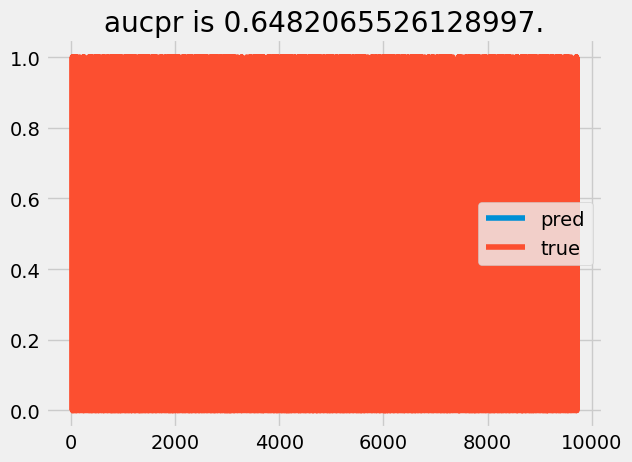

In [10]:
# plot all data point on a plot
if task == 'forecast':
    rmse = round(np.sqrt(np.mean((preds-y_test)**2)), 2)
    plt.title(f'RMSE is {rmse}.')
elif task == 'classification':
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    aucpr = auc(recall, precision)
    anses = np.where(preds<0.5, 0, 1)
    TP, FP, TN, FN = 0,0,0,0
    for ans, y in zip(anses, y_test):
        if ans == y:
            if ans == 1: TP += 1
            elif ans == 0: TN +=1
        elif ans != y:
            if ans == 1: FP += 1
            elif ans == 0: FN +=1
    acc=(TP+TN)/(TP+TN+FP+FN)*100
    try:
        precision, recall = round(TP/(TP+FP), 2), round(TP/(TP+FN), 2)
        f1 = round(2*(precision*recall)/(precision+recall), 2)
    except:
        precision, recall, f1 = 'DNF', 'DNF', 'DNF'
    s = f'Acc: {acc}; precision: {precision}; recall:{recall}; f1:{f1}'
    print(s)
    plt.title(f'aucpr is {aucpr}.')

plt.plot(preds[0],label='pred')
plt.plot(y_test,label='true')
plt.legend()
plt.show()

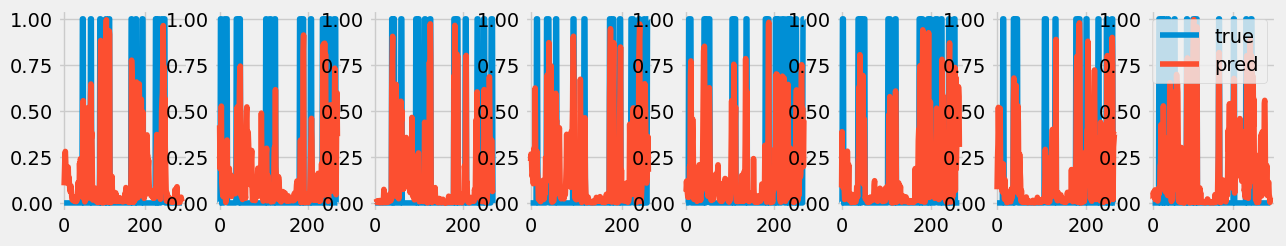

In [11]:
# visulized on many sample on validation data

sample_value = 8
samples = random.sample(split_time_test, sample_value)
fig, axs = plt.subplots(1, sample_value, figsize=(14, 2.5))

# y_test
# preds

for i in range(sample_value):
    true = [y_test[i] for i in range(samples[i][0], samples[i][1])]
    axs[i].plot(true, label='true')
    prediciton = [preds[i] for i in range(samples[i][0], samples[i][1])]
    axs[i].plot(prediciton, label='pred')

plt.legend()

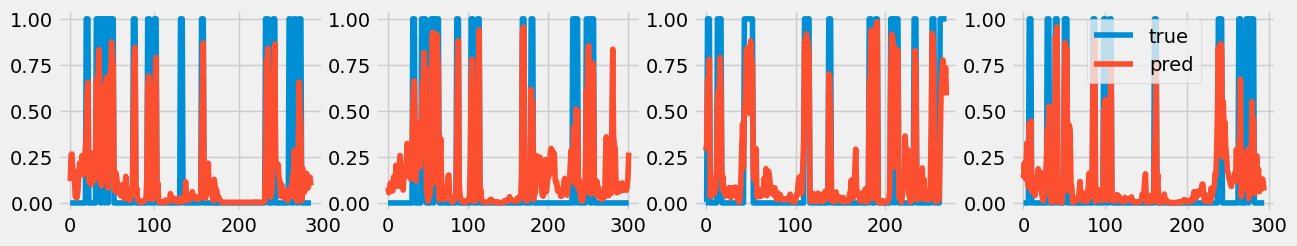

In [12]:
# Check whethet it do good on training data
sample_value = 4
samples = random.sample(split_time_train, sample_value)
preds_train = model.predict(train_data)

fig, axs = plt.subplots(1, sample_value, figsize=(14, 2.5))

for i in range(sample_value):
    true = [y_train[i] for i in range(samples[i][0], samples[i][1])]
    axs[i].plot(true, label='true')
    prediciton = [preds_train[i] for i in range(samples[i][0], samples[i][1])]
    axs[i].plot(prediciton, label='pred')

plt.legend()

# Debug

Loading training data...


  0%|          | 0/142 [00:00<?, ?it/s]

Loading testing data...


  0%|          | 0/35 [00:00<?, ?it/s]

[0]	train-logloss:0.62040	valid-logloss:0.63748
[1]	train-logloss:0.55952	valid-logloss:0.59234
[2]	train-logloss:0.50732	valid-logloss:0.55328
[3]	train-logloss:0.46202	valid-logloss:0.51916
[4]	train-logloss:0.42216	valid-logloss:0.49034
[5]	train-logloss:0.38697	valid-logloss:0.46553
[6]	train-logloss:0.35554	valid-logloss:0.44452
[7]	train-logloss:0.32761	valid-logloss:0.42584
[8]	train-logloss:0.30233	valid-logloss:0.40864
[9]	train-logloss:0.27975	valid-logloss:0.39364
[10]	train-logloss:0.25933	valid-logloss:0.38024
[11]	train-logloss:0.24069	valid-logloss:0.36847
[12]	train-logloss:0.22389	valid-logloss:0.35807
[13]	train-logloss:0.20829	valid-logloss:0.34911
[14]	train-logloss:0.19458	valid-logloss:0.34103
[15]	train-logloss:0.18207	valid-logloss:0.33433
[16]	train-logloss:0.17053	valid-logloss:0.32828
[17]	train-logloss:0.15998	valid-logloss:0.32258
[18]	train-logloss:0.15020	valid-logloss:0.31717
[19]	train-logloss:0.14138	valid-logloss:0.31290
[20]	train-logloss:0.13327	val

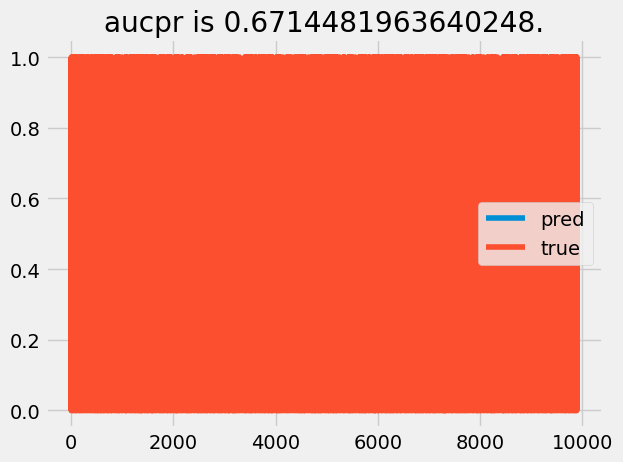

: 

In [13]:
# Time sequence length and prediction time length
seed = 5269
valid_ratio = 0.2

time_seq = 10
predict_t = 3

n = 300
max_depth = 20
eta = 0.1
n_estimators = 100
subsample = 1
colsample_bytree = 1
gamma = 0
task = 'classification'

train_dir_list, test_dir_list = train_valid_split(dir_list, valid_ratio)

# features = ['LTE_HO', 'MN_HO', 'eNB_to_ENDC', 'gNB_Rel', 'gNB_HO', 'RLF', 'SCG_RLF',
#         'num_of_neis', 'RSRP', 'RSRQ', 'RSRP1', 'RSRQ1', 'RSRP2', 'RSRQ2',
#         'nr-RSRP', 'nr-RSRQ', 'nr-RSRP1', 'nr-RSRQ1', 'nr-RSRP2', 'nr-RSRQ2'
#         ]

# without gNB_Rel, RSRP2, RSRQ2
features = ['LTE_HO', 'MN_HO', 'eNB_to_ENDC', 'gNB_HO', 'RLF', 'SCG_RLF',
        'num_of_neis', 'RSRP', 'RSRQ', 'RSRP1', 'RSRQ1',  
        'nr-RSRP', 'nr-RSRQ', 'nr-RSRP1', 'nr-RSRQ1', 'nr-RSRP2', 'nr-RSRQ2'
        ]

num_of_features = len(features)

target = ['LTE_HO', 'MN_HO'] # For eNB HO.
# target = ['eNB_to_ENDC'] # Setup gNB
# target = ['gNB_Rel', 'gNB_HO'] # For gNB HO.
# target = ['RLF'] # For RLF
# target = ['SCG_RLF'] # For scg failure
# target = ['dl-loss'] # For DL loss
# target = ['ul-loss'] # For UL loss


print('Loading training data...')
X_train, y_train, split_time_train = ts_array_create(dirname, train_dir_list, time_seq)
X_train_2d = X_train.reshape(-1, time_seq*num_of_features)

print('Loading testing data...')
X_test, y_test, split_time_test = ts_array_create(dirname, test_dir_list, time_seq)
X_test_2d = X_test.reshape(-1, time_seq*num_of_features)

train_data = xgb.DMatrix(X_train_2d, label=y_train)
test_data = xgb.DMatrix(X_test_2d, label=y_test)

if task == 'forecast':
    params = {"objective": "reg:squarederror", "tree_method": "gpu_hist", 'max_depth': max_depth, 'eta': eta, 'n_estimators': n_estimators,
              'subsample': subsample, 'colsample_bytree': colsample_bytree, 'gamma': gamma,
              'eval_metric': ['rmse', 'mae'], 'seed': seed}
elif task == 'classification':
    params = {'objective': 'binary:logistic', "tree_method": "gpu_hist", 'max_depth': max_depth, 'eta': eta,  
              'seed': seed} # 'eval_metric': ['auc', 'aucpr']}

model = xgb.train(
    params=params,
    dtrain=train_data,
    num_boost_round=n,
    evals=[(train_data, 'train'), (test_data, 'valid')],
)

preds = model.predict(test_data)

# plot all data point on a plot
if task == 'forecast':
    rmse = round(np.sqrt(np.mean((preds-y_test)**2)), 2)
    plt.title(f'RMSE is {rmse}.')
elif task == 'classification':
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    aucpr = auc(recall, precision)
    anses = np.where(preds<0.5, 0, 1)
    TP, FP, TN, FN = 0,0,0,0
    for ans, y in zip(anses, y_test):
        if ans == y:
            if ans == 1: TP += 1
            elif ans == 0: TN +=1
        elif ans != y:
            if ans == 1: FP += 1
            elif ans == 0: FN +=1
    acc=(TP+TN)/(TP+TN+FP+FN)*100
    try:
        precision, recall = round(TP/(TP+FP), 2), round(TP/(TP+FN), 2)
        f1 = round(2*(precision*recall)/(precision+recall), 2)
    except:
        precision, recall, f1 = 'DNF', 'DNF', 'DNF'
    s = f'Acc: {acc}; precision: {precision}; recall:{recall}; f1:{f1}'
    print(s)
    plt.title(f'aucpr is {aucpr}.')

plt.plot(preds[0],label='pred')
plt.plot(y_test,label='true')
plt.legend()
plt.show()